In [119]:
# importing necessary modules
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns



In [120]:
# loading training data
# downward shortwave radiation at surface at station 'ACME: dswrfs'
dswrfs = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\DSWRF\\dswrf_station.csv", header=None)
# downward longwave radiation at surface at station 'ACME: dlwrfs'
dlwrfs = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\DLWRF\\dlwrf_station.csv", header=None)
# upward shortwave radiation at surface at station 'ACME: uswrfs'
uswrfs = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\USWRF_sfc\\uswrfs_station.csv", header=None)
# upward longwave radiation at surface at station 'ACME: ulwrfs'
ulwrfs = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\ULWRF_sfc\\ulwrfs_station.csv", header=None)
# upward longwave radiation at top of the atmosphere (TOA) over station 'ACME': ulwrf
ulwrf = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\ULWRF\\ulwrf_station.csv", header=None)


# Temperature at surface at station 'ACME: ts'
ts = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\Temp_sfc\\ts_station.csv", header=None)
# Temperature 2m above surface at station 'ACME: t'
t = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\Temp\\t_station.csv", header=None)
# minimum temperature 2m above surface at station 'ACME: mint'
mint = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\Min_temp\\mint_station.csv", header=None)
# maximum temperature 2m above surface at station 'ACME: maxt'
maxt = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\Max_temp\\maxt_station.csv", header=None)


# total column-integrated condensate over the entire atmosphere at station 'ACME: tc'
tc = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\Total_condensate\\tc_station.csv", header=None)
# total cloud cover over the entire depth of the atmosphere at station 'ACME: tcc'
tcc = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\Total_cloud_cover\\tcc_station.csv", header=None)
# specific humidity at 2 m above ground 'ACME: h'
h = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\Sp_humidity\\h_station.csv", header=None)
# precipitable water over the entire depth of the atmosphere at station 'ACME: pw'
pw = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\Precip_water\\pw_station.csv", header=None)
# 3-Hour accumulated precipitation at the surface at station 'ACME': precip
precip = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\Precipitation\\precip_station.csv", header=None)
# air pressure at mean sea level at 'ACME': pr
pr = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\Pressure\\pr_station.csv", header=None)


# loading traget dataset
target = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\train.csv")

In [122]:
# prepareing the train dataset
x = pd.concat([dswrfs, dlwrfs, uswrfs, ulwrfs, ulwrf, ts, t, mint, maxt, tc, tcc, h, pw, precip, pr], axis=1)
x.columns = ['dswrfs', 'dlwrfs', 'uswrfs', 'ulwrfs', 'ulwrf', 'ts', 't', 'mint', 'maxt', 'tc', 'tcc', 'h', 'pw', 'precip', 'pr']
#print(x.head())
y0 = target['ACME']
X = x.values
y = y0.values

In [123]:
# preparing target dataset
# downward shortwave radiation at surface at station 'ACME: dswrfs'
dswrfs = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Test\\DSWRF\\dswrf_station.csv", header=None)
# downward longwave radiation at surface at station 'ACME: dlwrfs'
dlwrfs = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Test\\DLWRF\\dlwrf_station.csv", header=None)
# upward shortwave radiation at surface at station 'ACME: uswrfs'
uswrfs = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Test\\USWRF_sfc\\uswrfs_station.csv", header=None)
# upward longwave radiation at surface at station 'ACME: ulwrfs'
ulwrfs = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Test\\ULWRF_sfc\\ulwrfs_station.csv", header=None)
# upward longwave radiation at top of the atmosphere (TOA) over station 'ACME': ulwrf
ulwrf = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Test\\ULWRF\\ulwrf_station.csv", header=None)


# Temperature at surface at station 'ACME: ts'
ts = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Test\\Temp_sfc\\ts_station.csv", header=None)
# Temperature 2m above surface at station 'ACME: t'
t = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Test\\Temp\\t_station.csv", header=None)
# minimum temperature 2m above surface at station 'ACME: mint'
mint = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Test\\Min_temp\\mint_station.csv", header=None)
# maximum temperature 2m above surface at station 'ACME: maxt'
maxt = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Test\\Max_temp\\maxt_station.csv", header=None)


# total column-integrated condensate over the entire atmosphere at station 'ACME: tc'
tc = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Test\\Total_condensate\\tc_station.csv", header=None)
# total cloud cover over the entire depth of the atmosphere at station 'ACME: tcc'
tcc = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Test\\Total_cloud_cover\\tcc_station.csv", header=None)
# specific humidity at 2 m above ground 'ACME: h'
h = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Test\\Sp_humidity\\h_station.csv", header=None)
# precipitable water over the entire depth of the atmosphere at station 'ACME: pw'
pw = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Test\\Precip_water\\pw_station.csv", header=None)
# 3-Hour accumulated precipitation at the surface at station 'ACME': precip
precip = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Test\\Precipitation\\p_station.csv", header=None)
# air pressure at mean sea level at 'ACME': pr
pr = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Test\\Pressure\\pr_station.csv", header=None)

xt = pd.concat([dswrfs, dlwrfs, uswrfs, ulwrfs, ulwrf, ts, t, mint, maxt, tc, tcc, h, pw, precip, pr], axis=1)
X_target = xt.values

## Linear regression model

In [124]:
# linear regression on all features using test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))/np.mean(y_test)
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.8273110944532512
Root Mean Squared Error: 0.19124220227512276


In [125]:
# linear regression after scaled input dataset and pipeline
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
steps = [('scaler', StandardScaler()),
         ('linreg', LinearRegression())]
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create a linear regression object: reg
reg = LinearRegression()
fitted = pipeline.fit(X_train, y_train)
y_fit_trn_lr = pipeline.predict(X_train)
y_pred_tst = pipeline.predict(X_test)

# metrics
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_tst))/np.mean(y_test)
print("Root Mean Squared Error: {}".format(rmse_lr))

# residual distribution for the whole training set
y_fitted_lr = pipeline.predict(X)
residual_lr = y_fitted_lr - y

# prediction on unseen dataset
y_target_lr = pipeline.predict(X_target)

Root Mean Squared Error: 0.19124220227513045


## Gradient boosting model

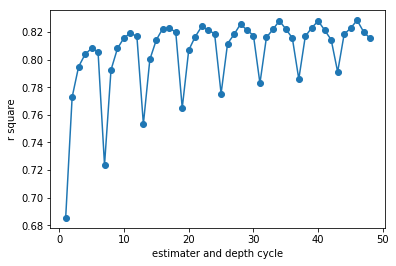

maximum r_sq: 0.8286322854058313


In [126]:
## Gradient Boosting: Hyperparameter  tuning 

n_space = np.arange(4,12,1)
depth_space = np.arange(1,7,1)
#learning_space = np.arange(0.1,1,0.2)
r_sq = []
for n in n_space:
    for depth in depth_space:
        #for learning in with optimum learning rate 0.4:
        params = {'n_estimators': n, 'max_depth': depth, 'learning_rate': 0.4, 'criterion': 'mse'}
        gradient_boosting_regressor = ensemble.GradientBoostingRegressor(**params)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
        gradient_boosting_regressor.fit(X_train, y_train)
        fitted = gradient_boosting_regressor.predict(X_train)
        residual = fitted - y_train
        r_sq.append(gradient_boosting_regressor.score(X_test, y_test)) 
        #print("R^2: {}".format(gradient_boosting_regressor.score(X_test, y_test)))
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        #print('depth, estimator, r^2', depth, n, gradient_boosting_regressor.score(X_test, y_test))
#print("R^2:", r_sq)
xi = np.arange(1, len(r_sq)+1)
plt.plot(xi, r_sq, marker='o')
plt.xlabel('estimater and depth cycle')
plt.ylabel('r square')
plt.show()
print('maximum r_sq:', max(r_sq))

Why the rsult does not get better???

In [127]:
# gradient boosting with optimum parameters
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
steps = [('scaler', StandardScaler()),
         ('GBreg', ensemble.GradientBoostingRegressor(**params))]
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

params = {
    'n_estimators': 10,
    'max_depth': 5,
    'learning_rate': 0.4,
    'criterion': 'mse'
}
# Create a regression object:
gradient_boosting_regressor = ensemble.GradientBoostingRegressor(**params)

fitted = pipeline.fit(X_train, y_train)
y_fitted = pipeline.predict(X_train)
y_pred = pipeline.predict(X_test)

# metrics
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred))/np.mean(y_test)
print("Root Mean Squared Error: {}".format(rmse_gb))

# residual distribution for the whole training set
y_fitted_gb = pipeline.predict(X)
residual_gb = y_fitted_gb - y

# prediction on unseen dataset
y_target_gb = pipeline.predict(X_target)

Root Mean Squared Error: 0.1972712116146461


## Compare linear regresison and gradient boosting

In [128]:
print('Normalized root mean square error: linear regression:', rmse_lr, 'gradient boosting:', rmse_gb)

Normalized root mean square error: linear regression: 0.19124220227513045 gradient boosting: 0.1972712116146461


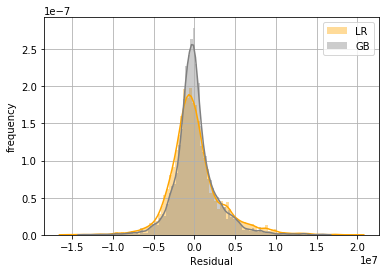

In [129]:
# residual distribution for the whole training set
ax = sns.distplot(residual_lr, bins=100, color="orange", label='LR')
ax = sns.distplot(residual_gb, bins=100, color="gray", label='GB')
ax.set_xlabel('Residual')
ax.set_ylabel('frequency')
ax.legend(loc='upper right')
ax.grid(True)
plt.show()


Residuals are more closely distributed to 0. This is an improvement. 

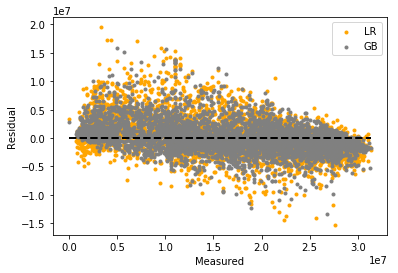

In [130]:
fig, ax = plt.subplots()
ax.scatter(y, residual_lr, marker='.', color='orange', label='LR')
ax.scatter(y, residual_gb, marker='.', color='gray', label='GB')
ax.plot([0, y.max()], [0,0], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Residual')
ax.legend(loc='upper right')
plt.show()


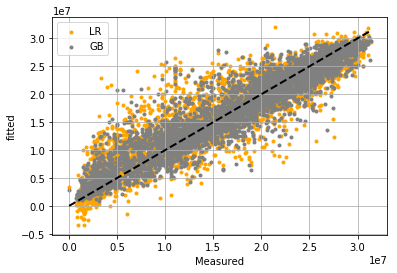

In [131]:
fig, ax = plt.subplots()
ax.scatter(y, y_fitted_lr, color='orange', marker='.', label='LR')
ax.scatter(y, y_fitted_gb, color='gray', marker='.', label='GB')
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('fitted')
ax.legend(loc='upper left')
plt.grid(True)
plt.show()


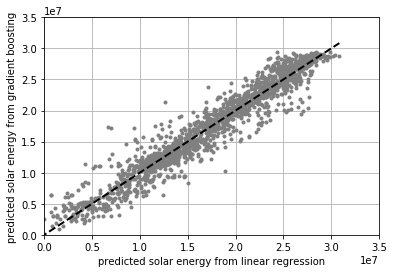

In [132]:
plt.plot(y_target_lr, y_target_gb, marker='.', color='gray', linestyle='None')
plt.plot([y_target_lr.min(), y_target_lr.max()], [y_target_lr.min(), y_target_lr.max()], 'k--', lw=2)
plt.xlabel('predicted solar energy from linear regression')
plt.ylabel('predicted solar energy from gradient boosting')
plt.xlim(0, 35000000)
plt.ylim(0, 35000000)
plt.grid(True)
plt.show()

Although the overall metric is similar gradient boosting (GB) has less bias. So, prediction from GB is more accurate.